In [5]:
#Exploratory Data Analysis
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os

#load dataset
file_path = 'Data/Raw/Womens Clothing E-Commerce Reviews.csv'
if os.path.exists(file_path):
	df = pd.read_csv(file_path)
	print(df.head())
else:
	print(f"File not found: {file_path}")

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [7]:
#data inspection
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [8]:
#data inspection
print(df.describe())

         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

In [9]:
#missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Title              3810
Review Text         845
Division Name        14
Department Name      14
Class Name           14
dtype: int64


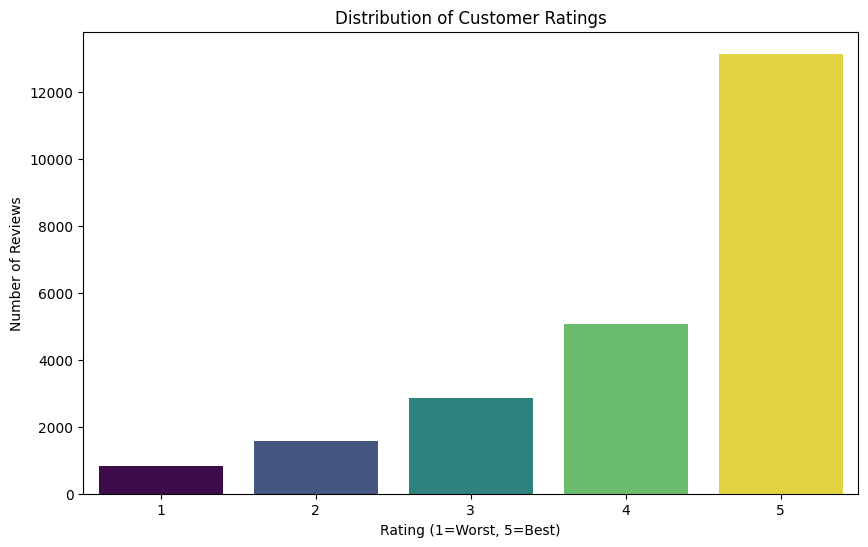

In [10]:
#Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis', hue='Rating', legend=False)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating (1=Worst, 5=Best)')
plt.ylabel('Number of Reviews')
plt.show()

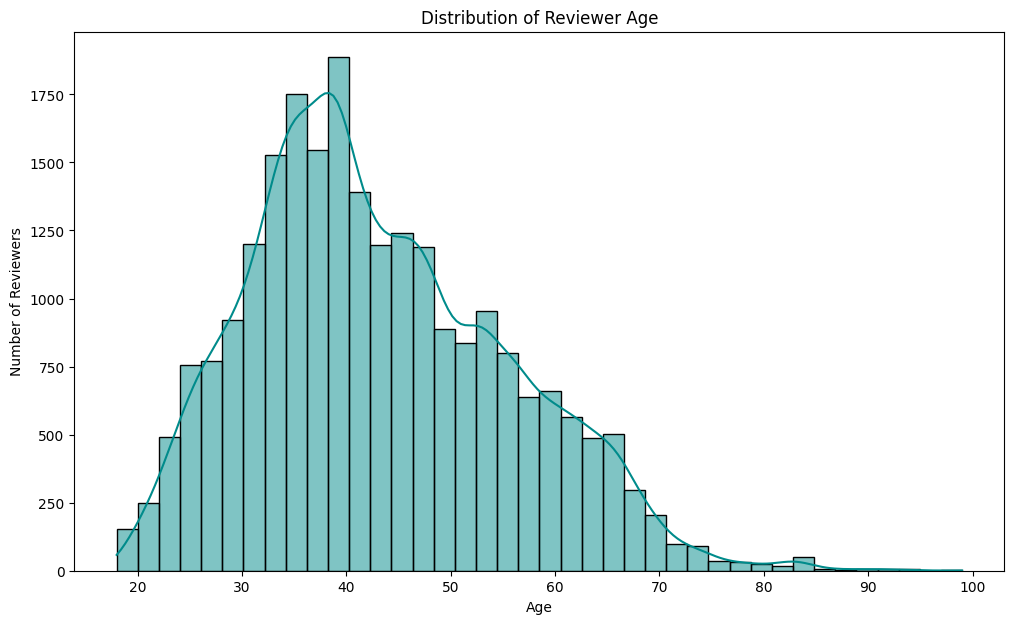

In [11]:
#Age Distribution
plt.figure(figsize=(12, 7))
sns.histplot(df['Age'], bins=40, kde=True, color='darkcyan')
plt.title('Distribution of Reviewer Age')
plt.xlabel('Age')
plt.ylabel('Number of Reviewers')
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/3125840433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['review_length'] = df_clean['Review Text'].apply(len)


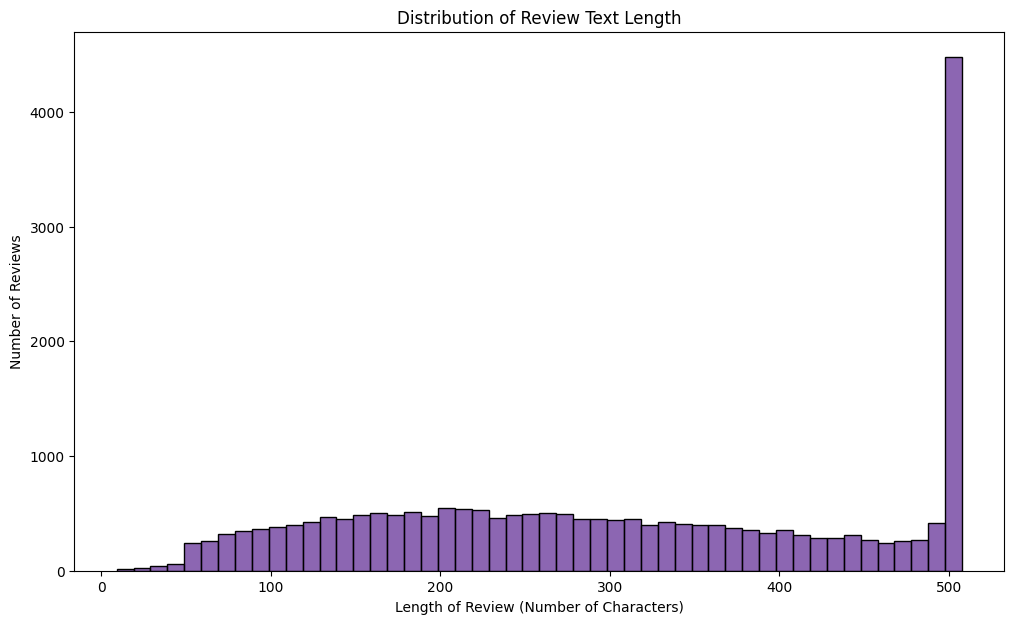

In [12]:
#Review Text Length
# First, we need to handle the missing reviews before calculating length
df_clean = df.dropna(subset=['Review Text'])

# Calculate the length of each review
df_clean['review_length'] = df_clean['Review Text'].apply(len)

plt.figure(figsize=(12, 7))
sns.histplot(data=df_clean, x='review_length', bins=50, color='rebeccapurple')
plt.title('Distribution of Review Text Length')
plt.xlabel('Length of Review (Number of Characters)')
plt.ylabel('Number of Reviews')
plt.show()

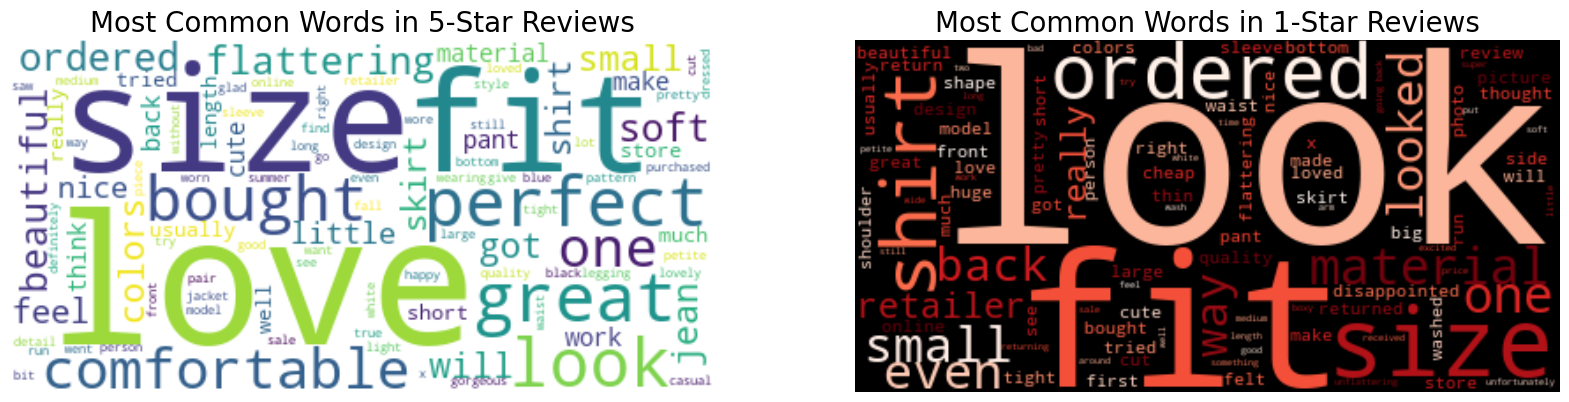

In [13]:
#Word Clouds
from wordcloud import WordCloud, STOPWORDS

# Get the text from the most positive (5-star) and most negative (1-star) reviews
positive_reviews = " ".join(review for review in df_clean[df_clean['Rating'] == 5]['Review Text'])
negative_reviews = " ".join(review for review in df_clean[df_clean['Rating'] == 1]['Review Text'])

# Create a set of stopwords (common words to ignore)
stopwords = set(STOPWORDS)
stopwords.update(["dress", "top", "blouse", "sweater", "wear", "fabric", "color"]) # Add common clothing words

# Generate the word cloud for positive reviews
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white", colormap='viridis', max_words=100).generate(positive_reviews)

# Generate the word cloud for negative reviews
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="black", colormap='Reds', max_words=100).generate(negative_reviews)

# Plot the word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.set_title('Most Common Words in 5-Star Reviews', fontsize=20)
ax1.axis("off")

ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.set_title('Most Common Words in 1-Star Reviews', fontsize=20)
ax2.axis("off")

plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/1003241232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


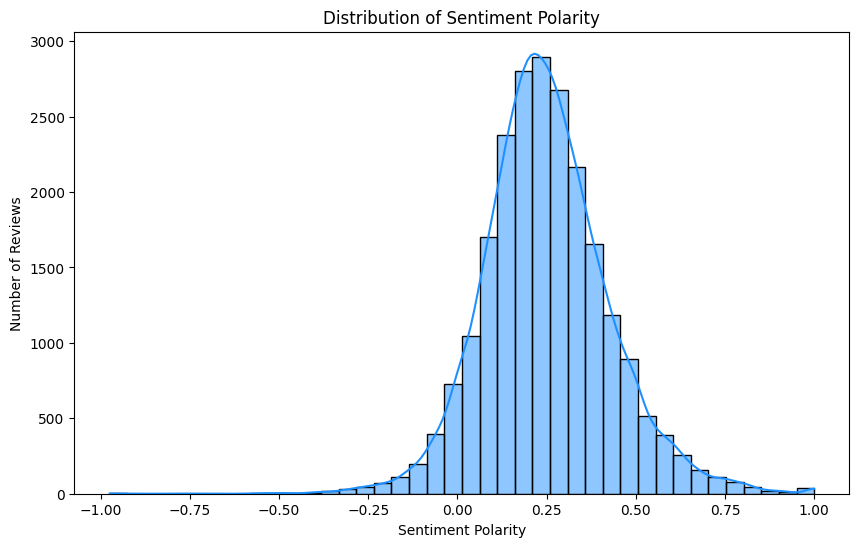

In [14]:
# Sentiment Analysis Distribution
from textblob import TextBlob

# Calculate sentiment polarity for each review
df_clean['sentiment'] = df_clean['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['sentiment'], bins=40, kde=True, color='dodgerblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.show()

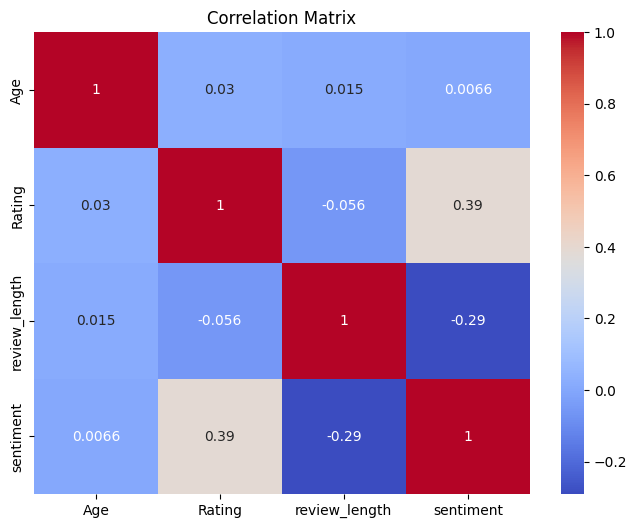

In [15]:
# Correlation Analysis
corr = df_clean[['Age', 'Rating', 'review_length', 'sentiment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/784799873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department Name', data=df_clean, order=df_clean['Department Name'].value_counts().index, palette='mako')


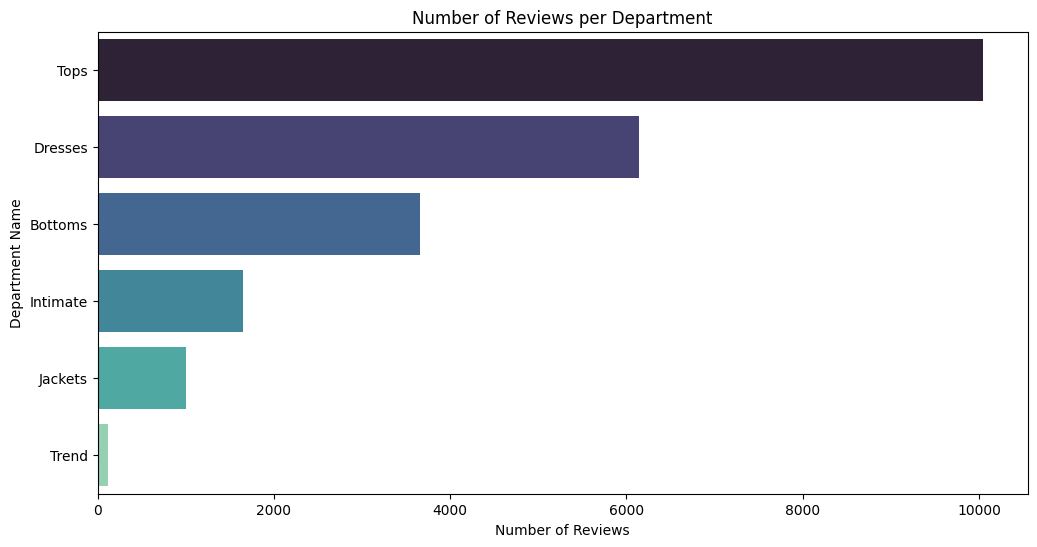

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/784799873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department Name', y='Rating', data=df_clean, palette='Set2')


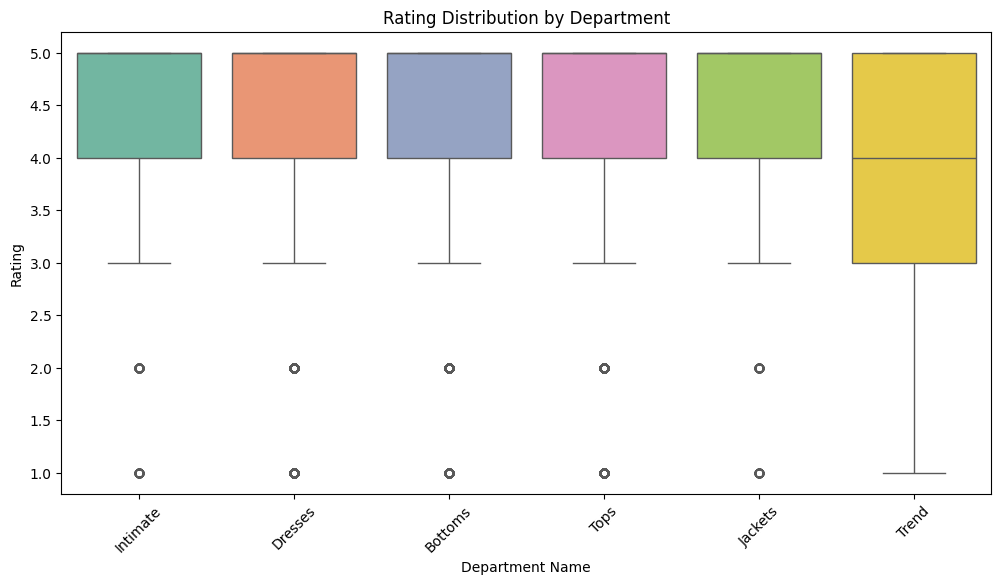

In [16]:
# Product/Category Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Department Name', data=df_clean, order=df_clean['Department Name'].value_counts().index, palette='mako')
plt.title('Number of Reviews per Department')
plt.xlabel('Number of Reviews')
plt.ylabel('Department Name')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department Name', y='Rating', data=df_clean, palette='Set2')
plt.title('Rating Distribution by Department')
plt.xticks(rotation=45)
plt.show()

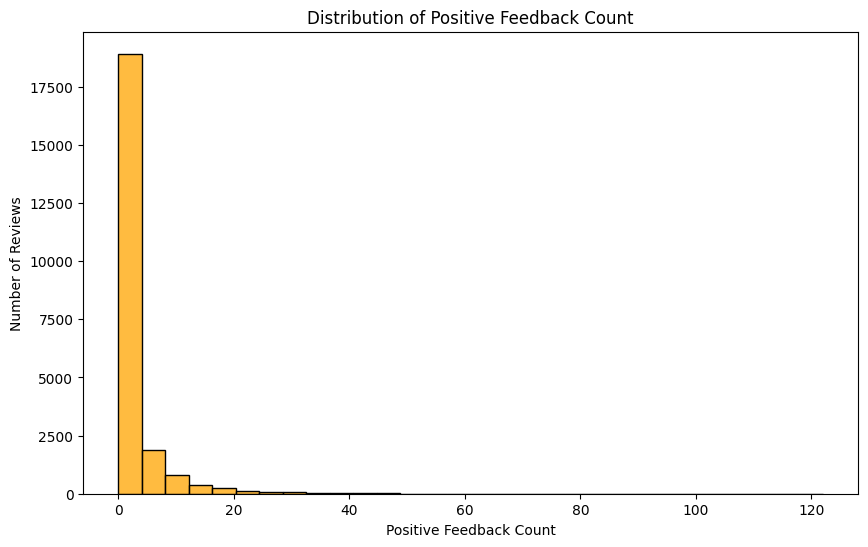

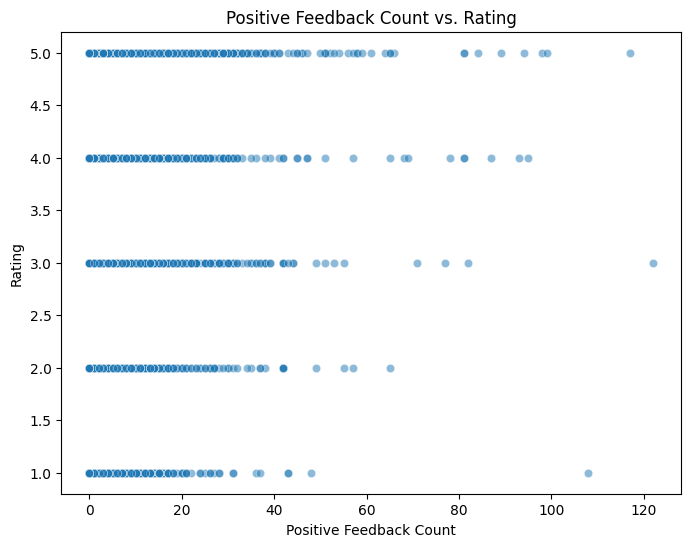

In [17]:
# Helpful Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Positive Feedback Count'], bins=30, color='orange')
plt.title('Distribution of Positive Feedback Count')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Positive Feedback Count', y='Rating', data=df_clean, alpha=0.5)
plt.title('Positive Feedback Count vs. Rating')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Rating')
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/445435255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Age', data=df_clean, palette='Blues')


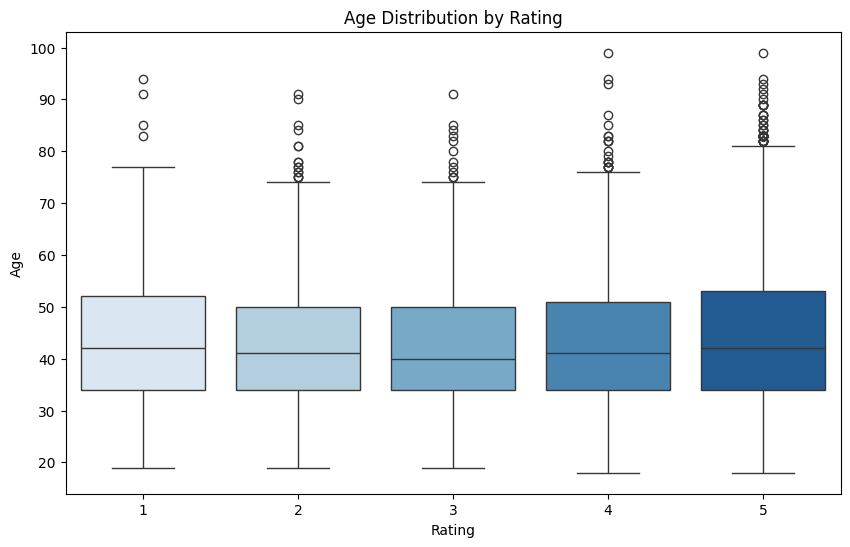

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/445435255.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='review_length', data=df_clean, palette='Purples')


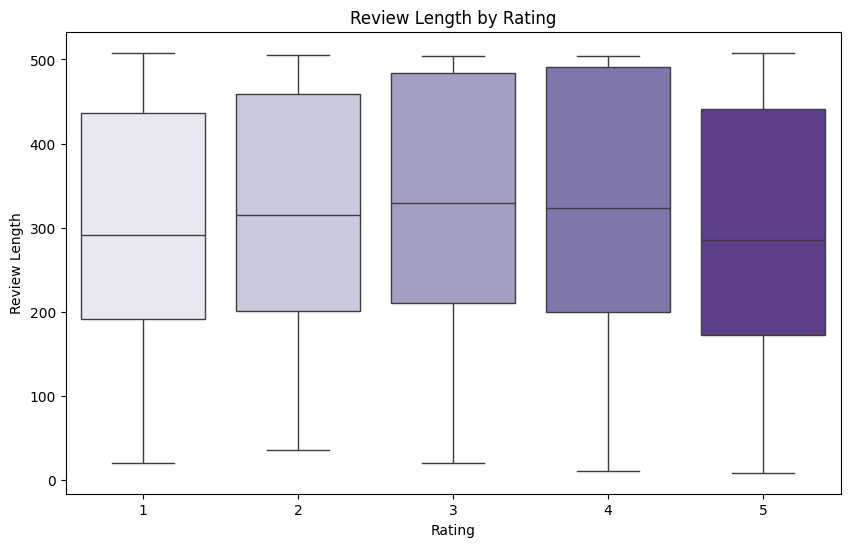

In [20]:
# Bivariate Analysis: Age vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Age', data=df_clean, palette='Blues')
plt.title('Age Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

# Bivariate Analysis: Review Length vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='review_length', data=df_clean, palette='Purples')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_1811/4258054827.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=bigrams, palette='crest')


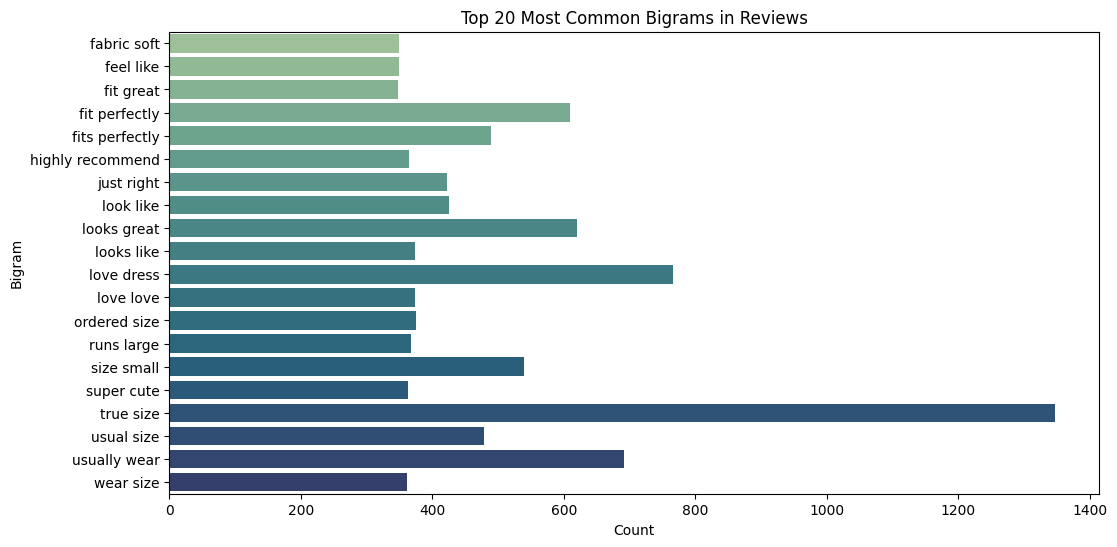

In [21]:
# Text Feature Exploration: Most Common Bigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X2 = vectorizer.fit_transform(df_clean['Review Text'])
bigrams = vectorizer.get_feature_names_out()
counts = X2.sum(axis=0).A1

plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=bigrams, palette='crest')
plt.title('Top 20 Most Common Bigrams in Reviews')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()